# Practical Exam: Supermarket Loyalty

International Essentials is an international supermarket chain.

Shoppers at their supermarkets can sign up for a loyalty program that provides rewards each year to customers based on their spending. The more you spend the bigger the rewards. 

The supermarket would like to be able to predict the likely amount customers in the program will spend, so they can estimate the cost of the rewards. 

This will help them to predict the likely profit at the end of the year.

## Data

The dataset contains records of customers for their last full year of the loyalty program.

| Column Name | Criteria                                                |
|-------------|---------------------------------------------------------|
|customer_id | Unique identifier for the customer. </br>Missing values are not possible due to the database structure. |
|spend | Continuous. </br>The total spend of the customer in their last full year. This can be any positive value to two decimal places. </br>Missing values should be replaced with 0. |
|first_month | Continuous. </br>The amount spent by the customer in their first month of the year. This can be any positive value, rounded to two decimal places. </br>Missing values should be replaced with 0. |
| items_in_first_month | Discrete. </br>The number of items purchased in the first month. Any integer value greater than or equal to zero. </br>Missing values should be replaced by 0. |  
| region | Nominal. </br>The geographic region that the customer is based in. One of four values Americas, Asia/Pacific, Europe, Middle East/Africa. </br>Missing values should be replaced with "Unknown". |
| loyalty_years | Oridinal. </br>The number of years the customer has been a part of the loyalty program. One of five ordered categories, '0-1', '1-3', '3-5', '5-10', '10+'. </br>Missing values should be replaced with '0-1'.|
| joining_month | Nominal. </br>The month the customer joined the loyalty program. One of 12 values "Jan", "Feb", "Mar", "Apr", etc. </br>Missing values should be replaced with "Unknown".|
| promotion | Nominal. </br>Did the customer join the loyalty program as part of a promotion? Either 'Yes' or 'No'. </br>Missing values should be replaced with 'No'.|


# Task 1

Before you fit any models, you will need to make sure the data is clean. 

The table below shows what the data should look like. 

Create a cleaned version of the dataframe. 

 - You should start with the data in the file "loyalty.csv". 

 - Your output should be a dataframe named `clean_data`. 

 - All column names and values should match the table below.

| Column Name | Criteria                                                |
|-------------|---------------------------------------------------------|
|customer_id | Unique identifier for the customer. </br>Missing values are not possible due to the database structure. |
|spend | Continuous. </br>The total spend of the customer in their last full year. This can be any positive value to two decimal places. </br>Missing values should be replaced with 0. |
|first_month | Continuous. </br>The amount spent by the customer in their first month of the year. This can be any positive value, rounded to two decimal places. </br>Missing values should be replaced with 0. |
| items_in_first_month | Discrete. </br>The number of items purchased in the first month. Any integer value greater than or equal to zero. </br>Missing values should be replaced by 0. |  
| region | Nominal. </br>The geographic region that the customer is based in. One of four values Americas, Asia/Pacific, Europe, Middle East/Africa. </br>Missing values should be replaced with "Unknown". |
| loyalty_years | Oridinal. </br>The number of years the customer has been a part of the loyalty program. One of five ordered categories, '0-1', '1-3', '3-5', '5-10', '10+'. </br>Missing values should be replaced with '0-1'.|
| joining_month | Nominal. </br>The month the customer joined the loyalty program. One of 12 values "Jan", "Feb", "Mar", "Apr", etc. </br>Missing values should be replaced with "Unknown".|
| promotion | Nominal. </br>Did the customer join the loyalty program as part of a promotion? Either 'Yes' or 'No'. </br>Missing values should be replaced with 'No'.|

In [23]:
import pandas as pd

# Load the data
df = pd.read_csv("loyalty.csv")

# Cleaning the DataFrame
# 1. Ensure 'customer_id' has no missing values
df['customer_id'] = df['customer_id'].dropna()

# 2. Clean 'spend'
df['spend'] = df['spend'].fillna(0).round(2)
df['spend'] = df['spend']  # Ensure all values are non-negative

# 3. Clean 'first_month'
df['first_month'] = df['first_month'].fillna(0)
df['first_month'] = df['first_month']

# 4. Clean 'items_in_first_month'
df['items_in_first_month'] = df['items_in_first_month'].fillna(0).astype(int)
df['items_in_first_month'] = df['items_in_first_month']

# 5. Clean 'region'
df['region'] = df['region'].fillna("Unknown")
valid_regions = ["Americas", "Asia/Pacific", "Europe", "Middle East/Africa"]
df['region'] = df['region'].where(df['region'].isin(valid_regions), "Unknown")

# 6. Clean 'loyalty_years'
df['loyalty_years'] = df['loyalty_years'].fillna("0-1")
valid_loyalty_years = ['0-1', '1-3', '3-5', '5-10', '10+']
df['loyalty_years'] = df['loyalty_years'].where(df['loyalty_years'].isin(valid_loyalty_years), "0-1")

# 7. Clean 'joining_month'
df['joining_month'] = df['joining_month'].fillna("Unknown")
valid_months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
df['joining_month'] = df['joining_month'].where(df['joining_month'].isin(valid_months), "Unknown")

# 8. Clean 'promotion'
df['promotion'] = df['promotion'].fillna("No")
df['promotion'] = df['promotion'].where(df['promotion'].isin(['Yes', 'No']), "No")

# Create the cleaned DataFrame
clean_data = df.copy()

# Convert data types safely
# 1. customer_id: Ensure it's a string
clean_data['customer_id'] = clean_data['customer_id'].astype(str)

# 2. spend: Convert to float, replacing non-numeric with NaN, then fill NaN with 0
clean_data['spend'] = pd.to_numeric(clean_data['spend'], errors='coerce').fillna(0).round(2)

# 3. first_month: Convert to float, replacing non-numeric with NaN, then fill NaN with 0
clean_data['first_month'] = pd.to_numeric(clean_data['first_month'], errors='coerce').fillna(0).round(2)

# 4. items_in_first_month: Convert to integer, replacing non-numeric with NaN, then fill NaN with 0
clean_data['items_in_first_month'] = pd.to_numeric(clean_data['items_in_first_month'], errors='coerce').fillna(0).astype(int)

# 5. region: Ensure it's a category
clean_data['region'] = clean_data['region'].astype('category')

# 6. loyalty_years: Ensure it's an ordered categorical type
loyalty_years_categories = ['0-1', '1-3', '3-5', '5-10', '10+']
clean_data['loyalty_years'] = pd.Categorical(clean_data['loyalty_years'], categories=loyalty_years_categories, ordered=True)

# 7. joining_month: Ensure it's a category
clean_data['joining_month'] = clean_data['joining_month'].astype('category')

# 8. promotion: Ensure it's a category
clean_data['promotion'] = clean_data['promotion'].astype('category')

# Display the cleaned DataFrame
print(clean_data)


     customer_id   spend  first_month  ...  loyalty_years joining_month promotion
0              1  132.68        15.30  ...           5-10           Nov        No
1              2  106.45        16.20  ...            0-1           Feb       Yes
2              3  123.16        25.26  ...            10+           Dec       Yes
3              4  130.60        24.74  ...            3-5           Apr        No
4              5  130.41        25.59  ...            3-5           Apr       Yes
...          ...     ...          ...  ...            ...           ...       ...
1241        1242  126.01        15.97  ...            1-3       Unknown       Yes
1242        1243  111.85        21.22  ...            0-1           Jan        No
1243        1244  132.51        16.23  ...           5-10           Aug        No
1244        1245  131.57        21.21  ...            1-3       Unknown        No
1245        1246  135.85        18.99  ...           5-10       Unknown        No

[1246 rows x 8 

# Task 2 

The team at International Essentials have told you that they have always believed that the number of years in the loyalty scheme is the biggest driver of spend. 

Producing a table showing the difference in the average spend by number of years in the loyalty programme along with the variance to investigate this question for the team.

 - You should start with the data in the file 'loyalty.csv'.

 - Your output should be a data frame named `spend_by_years`. 

 - It should include the three columns `loyalty_years`, `avg_spend`, `var_spend`. 

 - Your answers should be rounded to 2 decimal places.   

  loyalty_years  avg_spend  var_spend
0           0-1     110.56       9.30
1           1-3     129.31       9.65
2           10+     117.41      16.72
3           3-5     124.55      11.09
4          5-10     135.15      14.10


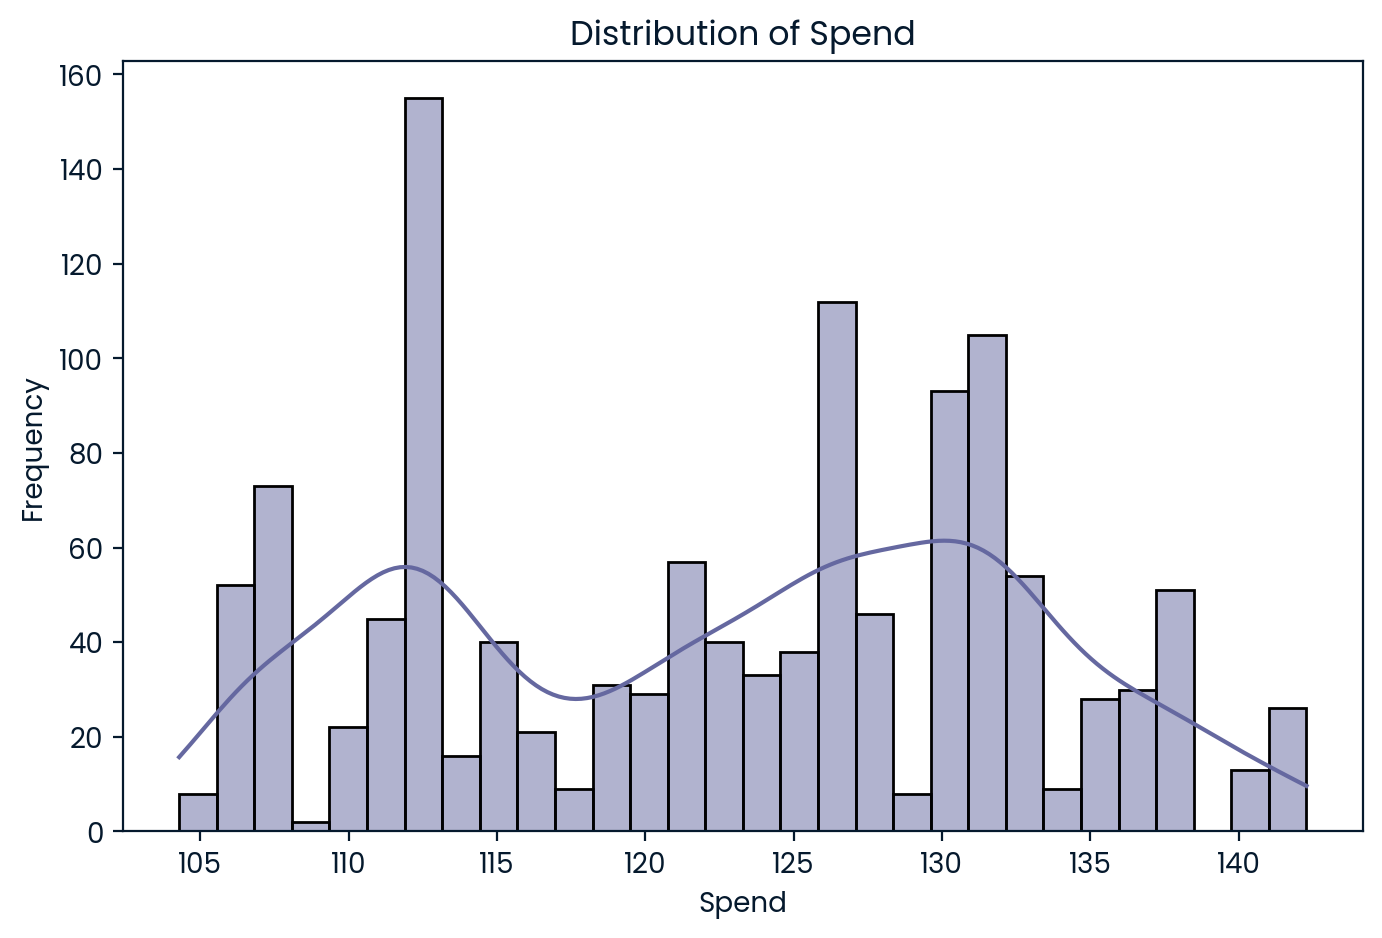

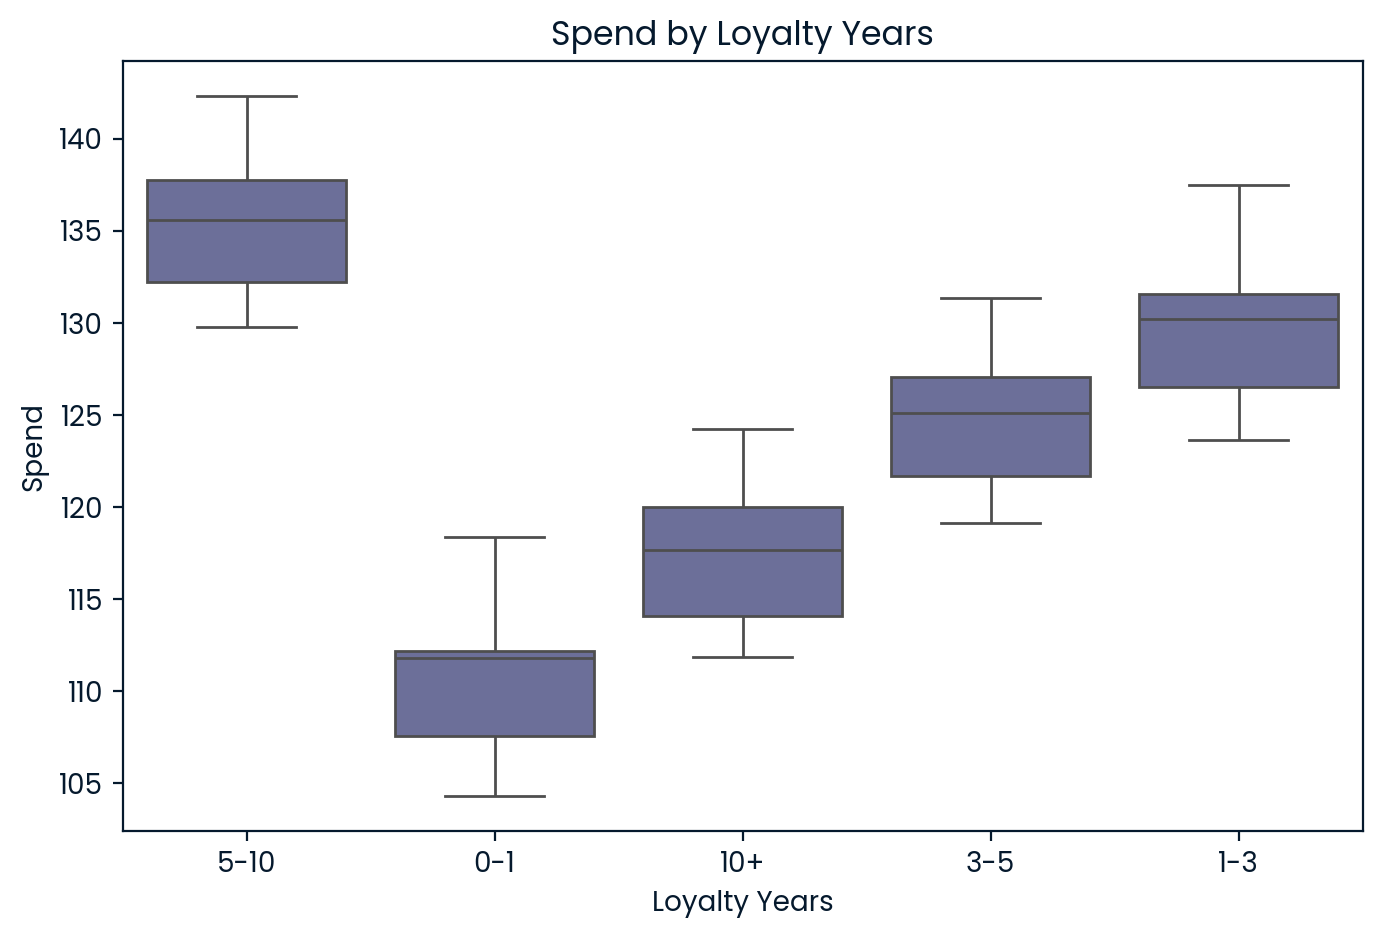

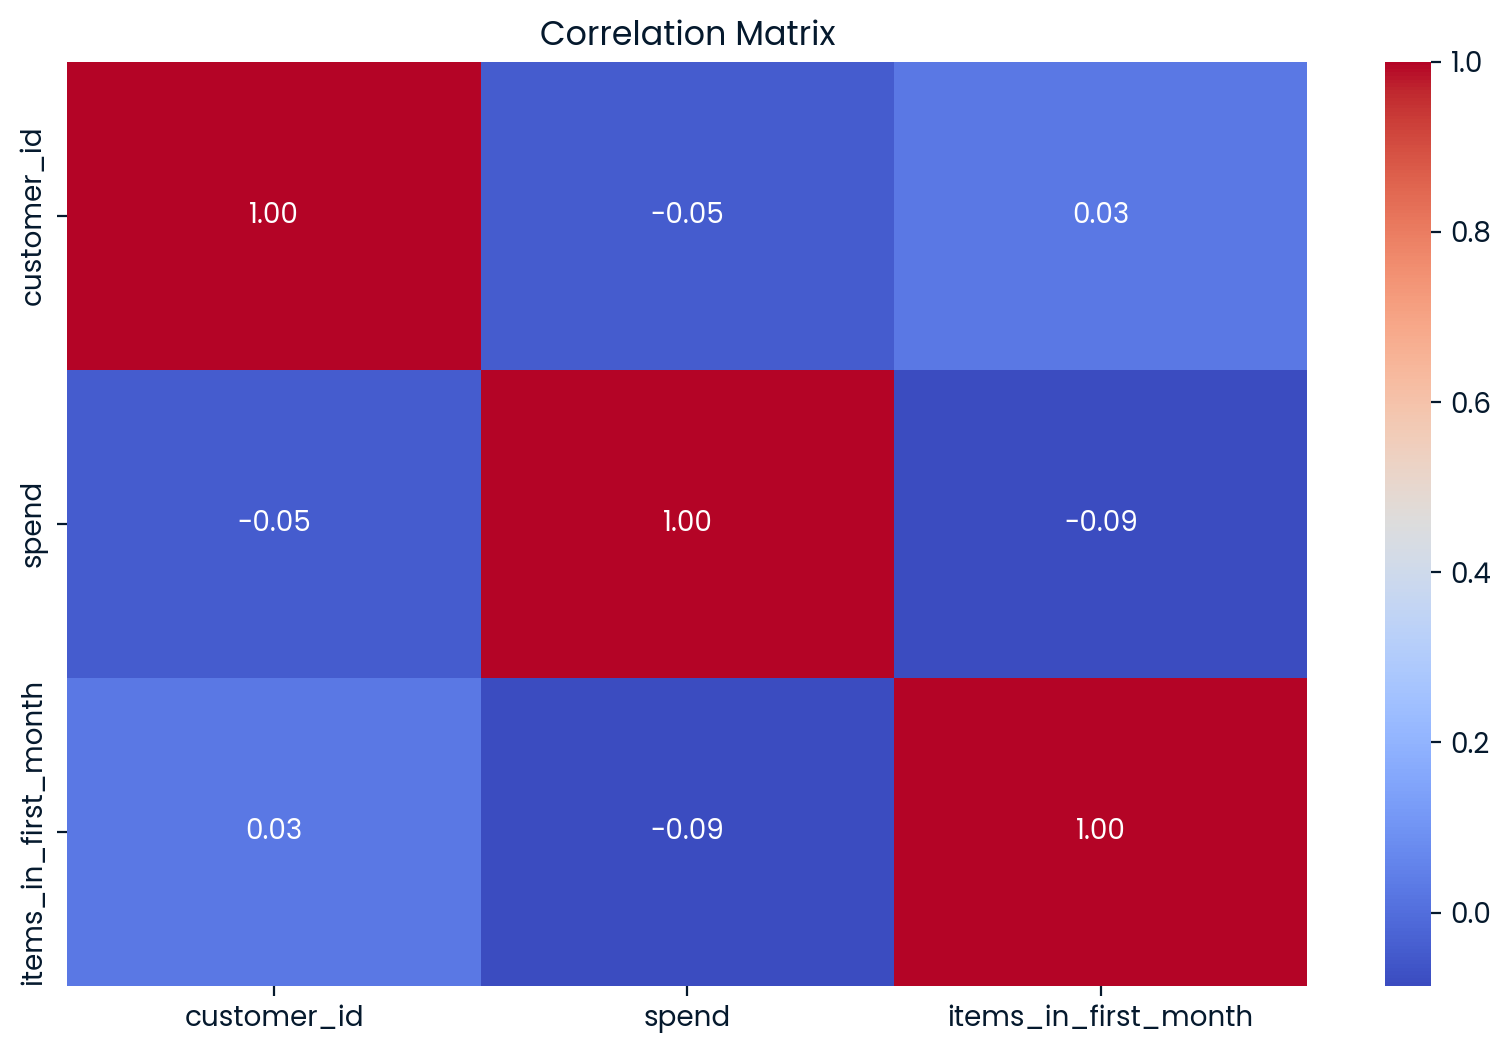

In [31]:
# Use this cell to write your code for Task 2
spend_by_years = df.groupby('loyalty_years')['spend'].agg(
    avg_spend='mean',
    var_spend='var'
).reset_index()

# Round the results to 2 decimal places
spend_by_years['avg_spend'] = spend_by_years['avg_spend'].round(2)
spend_by_years['var_spend'] = spend_by_years['var_spend'].round(2)

# Display the resulting DataFrame
print(spend_by_years)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df['spend'], bins=30, kde=True)
plt.title('Distribution of Spend')
plt.xlabel('Spend')
plt.ylabel('Frequency')
plt.show()
plt.savefig('spend_vs_frequency.png')  # Saves the plot to the local file system
plt.close()  #
#############
plt.figure(figsize=(8, 5))
sns.boxplot(x='loyalty_years', y='spend', data=df)
plt.title('Spend by Loyalty Years')
plt.xlabel('Loyalty Years')
plt.ylabel('Spend')
plt.show()
plt.savefig('loyalty_years_vs_spend.png')  # Saves the plot to the local file system
plt.close()  #
##########
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
plt.savefig('correlation.png')  # Saves the plot to the local file system
plt.close()  #


# Task 3

Fit a baseline model to predict the spend over the year for each customer.

 1. Fit your model using the data contained in “train.csv” </br></br>

 2. Use “test.csv” to predict new values based on your model. You must return a dataframe named `base_result`, that includes `customer_id` and `spend`. The `spend` column must be your predicted values.

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

def clean_data(df):
    df.fillna(method='ffill', inplace=True)
    df = pd.get_dummies(df, drop_first=True)
    df.drop_duplicates(inplace=True)
    return df

# Load and clean training data
train_data = pd.read_csv("train.csv")
train_data = clean_data(train_data)

X_train = train_data.drop(columns=['customer_id', 'spend'])
y_train = train_data['spend']

# Train model
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)

# Load and clean test data
test_data = pd.read_csv("test.csv")
test_data = clean_data(test_data)

# Prepare features for prediction
X_test = test_data.drop(columns=['customer_id'])

# Predict
predicted_spend = baseline_model.predict(X_test)

# Prepare result DataFrame
base_result = pd.DataFrame({
    'customer_id': test_data['customer_id'],
    'predicted_spend': predicted_spend
})

print(base_result.head())


   customer_id  predicted_spend
0            5       140.699644
1            7       148.730919
2           16       140.810384
3           17       150.649670
4           19       153.628831


# Task 4

Fit a comparison model to predict the spend over the year for each customer.

 1. Fit your model using the data contained in “train.csv” </br></br>

 2. Use “test.csv” to predict new values based on your model. You must return a dataframe named `compare_result`, that includes `customer_id` and `spend`. The `spend` column must be your predicted values.

Baseline Model Metrics: {'MAE': 0.17532187250856768, 'MSE': 0.05126553017744677, 'R² Score': 0.999907211767353}
Comparison Model Metrics: {'MAE': 0.26122364955357513, 'MSE': 0.1489919624790976, 'R² Score': 0.9997303314560643}


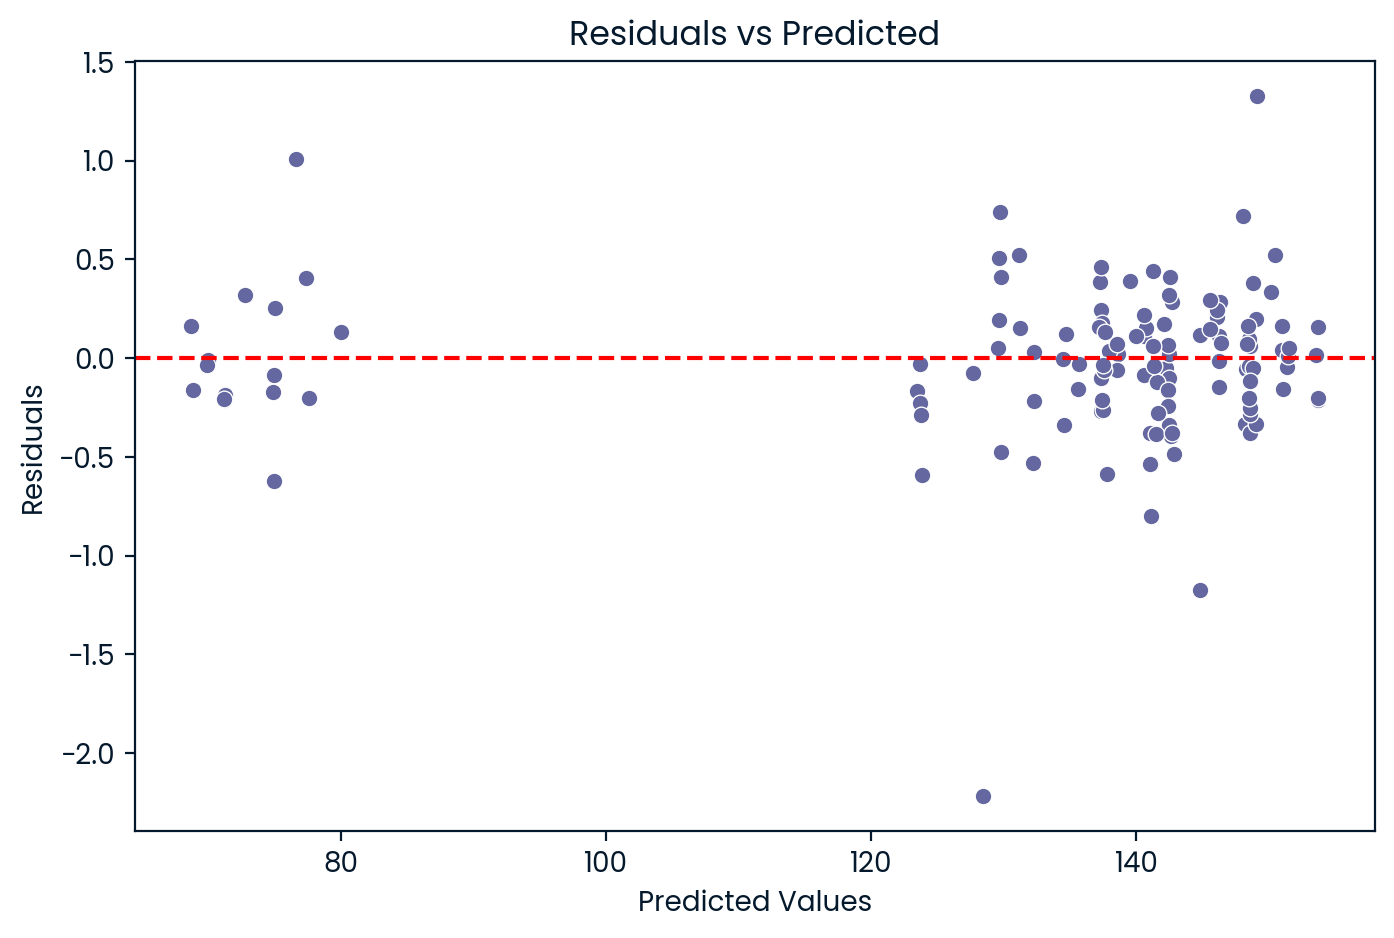

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Fit the comparison model
comparison_model = RandomForestRegressor(n_estimators=100, random_state=42)
comparison_model.fit(X_train, y_train)

# Predict spend using the comparison model on the validation set
y_val_pred = comparison_model.predict(X_val)

# Evaluate the model with validation data
def evaluate_model(model, X_train, y_train, X_val, y_val):
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    metrics = {
        'MAE': mean_absolute_error(y_val, y_val_pred),
        'MSE': mean_squared_error(y_val, y_val_pred),
        'R² Score': r2_score(y_val, y_val_pred)
    }
    return metrics

# Example usage:
baseline_metrics = evaluate_model(baseline_model, X_train, y_train, X_val, y_val)
comparison_metrics = evaluate_model(comparison_model, X_train, y_train, X_val, y_val)

print("Baseline Model Metrics:", baseline_metrics)
print("Comparison Model Metrics:", comparison_metrics)

# Residuals plot
residuals = y_val - y_val_pred
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_val_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()
plt.savefig('residuals_vs_predicted.png')  # Saves the plot to the local file system
plt.close()  #
